In [53]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward, fcluster, dendrogram, linkage, single, complete
from scipy.spatial.distance import pdist
from sklearn.mixture import GaussianMixture

In [3]:
def load_CoVoST2(data_path):
    data = np.load(data_path+'/speech_trn.npz', allow_pickle=True)
    Xtrn, Ytrn = data['Xtrn'], data['Ytrn']
    data = np.load(data_path+'/speech_tst.npz', allow_pickle=True)
    Xtst, Ytst = data['Xtst'], data['Ytst']
    return Xtrn, Ytrn, Xtst, Ytst

In [4]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "\data"
Xtrn, Ytrn, Xtst, Ytst = load_CoVoST2(path)

In [49]:
l0 = []
for row in range(Xtrn.shape[0]):
    if Ytrn[row] == 0:
        l0.append(Xtrn[row])

In [54]:
k_vals = [1, 3, 5, 10, 15]

In [62]:
diag_scores = []
for k in k_vals:
    gm = GaussianMixture(n_components=k, covariance_type="diag")
    gm.fit(l0)
    diag_scores.append(gm.score(l0))

In [63]:
full_scores = []
for k in k_vals:
    gm2 = GaussianMixture(n_components=k, covariance_type="full")
    gm2.fit(l0)
    full_scores.append(gm2.score(l0))

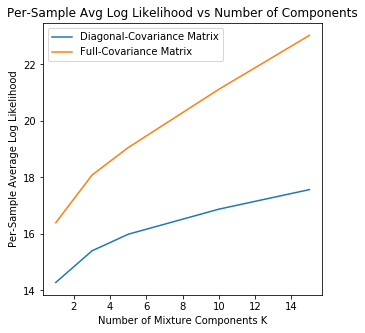

In [72]:
plt.figure(figsize=(5,5))
plt.plot(k_vals, diag_scores, label="Diagonal-Covariance Matrix")
plt.plot(k_vals, full_scores, label="Full-Covariance Matrix")
plt.legend()
plt.xlabel("Number of Mixture Components K")
plt.ylabel("Per-Sample Average Log Likelihood")
plt.title("Per-Sample Avg Log Likelihood vs Number of Components")
plt.savefig("3_5.png")
plt.show()